# **Hate Speech Detection in Movie Reviews**


# **Problem Statement**

Online movie reviews significantly influence the entertainment industry, but hate speech can damage reputations and discourage engagement. Uncontrolled hate speech risks user trust, legal issues, and reduced revenue. Identifying and removing hate speech is essential for maintaining reputation, legal compliance, and user satisfaction.

# **Solution**

This project aims to detect hate speech in movie reviews using both Random Forest for scalable moderation and BiLSTM for nuanced context understanding. Leveraging a high-quality dataset with labeled movie reviews, our models aim to accurately identify offensive content, enhancing user experience, protecting platform reputation, and ensuring legal compliance.

 # **Dataset Description:-**

We used the Davidson dataset, which includes over 24,000 annotated tweets classified as hate speech, offensive language, or neither, for our hate speech detection project. This well-balanced and carefully labeled dataset helps us develop robust algorithms to accurately identify offensive material in movie reviews.

Examples:
- **Tweet:** "@RTNBA: Drakes new shoes... dudes a fag"  

  **Class: 0** - Non-offensive and no hate speech

- **Tweet:** "& you might not get ya bitch back & thats that"  

  **Class: 1** - Offensive

- **Tweet:** "@OSAY_it_aint_so: &#8220;@IgnoreAllLaws... WHOA CHIL”  

  **Class: 1** - Hate speech

# **Dataset**
 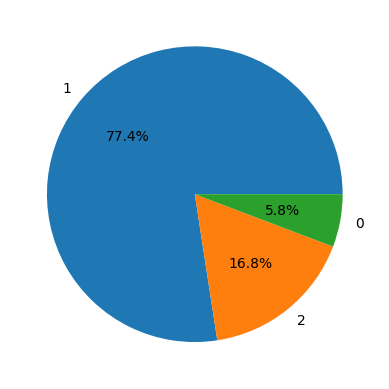

# **Dataset Cleaning:**

**Steps Taken:**
1. Dataset Loading and Inspection: We started by loading the dataset and inspecting its structure to understand its size and composition.

2. Usernames Removal: Usernames (mentions) were removed from tweets to focus purely on content analysis.

3. Numeric Sequence Removal: Sequences of numbers in tweets were removed as they typically do not contribute to content analysis.

4. URL Stripping: URLs were stripped from tweets to clean the text and remove unnecessary web-related information.

5. Text Lowercasing: All text was converted to lowercase to ensure consistency and prevent variations in case affecting the analysis.

6. Punctuation Removal: Punctuation marks were removed to simplify text analysis and ensure uniformity in the dataset.

7. Abbreviation Standardization: Common abbreviations and slang were replaced with their full forms to standardize language usage and enhance interpretability.

8. Stopword Removal and Lemmatization: Stopwords (common words like "and", "the", etc.) were removed, and the remaining words were lemmatized to reduce redundancy and focus on meaningful content.

# **Model Development:**

In our approach to detecting hate speech, we employ a variety of machine learning (ML) and deep learning (DL) models tailored to leverage their unique strengths in analyzing textual data. Each model is selected based on its ability to handle different aspects of hate speech detection, from traditional ML classifiers to advanced DL architectures.

TF-IDF (Term Frequency-Inverse Document Frequency) and tokenization serve as foundational techniques in this project's natural language processing (NLP) pipeline, playing pivotal roles in text preprocessing and feature engineering.

TF-IDF (Term Frequency-Inverse Document Frequency) and tokenization serve as foundational techniques in this project's natural language processing (NLP) pipeline, playing pivotal roles in text preprocessing and feature engineering.

 **Performance:** Several types of metrics were used to assess the Deep Learning model's performance, but the F1 score—a combination of precision and recall—was the primary focus. Because the DL model was able to obtain a high F1 score, it was effective for the following stage.
 

**Prediction:** To evaluate the model's performance on real-time data, the DL Model is prepared for real-time detection on the comments.


# **Data Visualization :**
1. Train, validation and test data

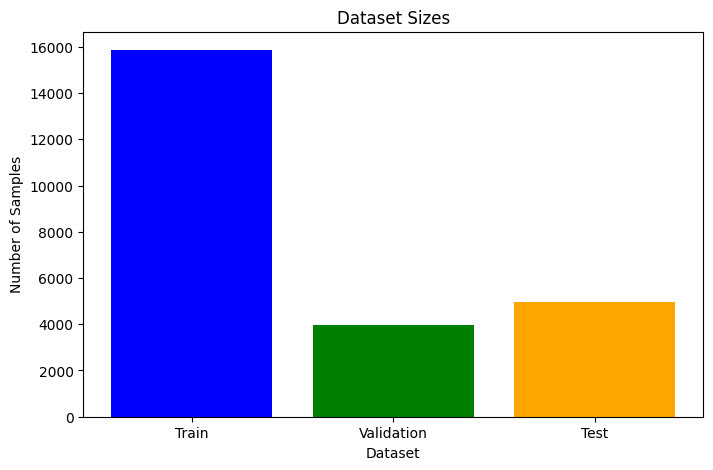

2. Precision-recall curve

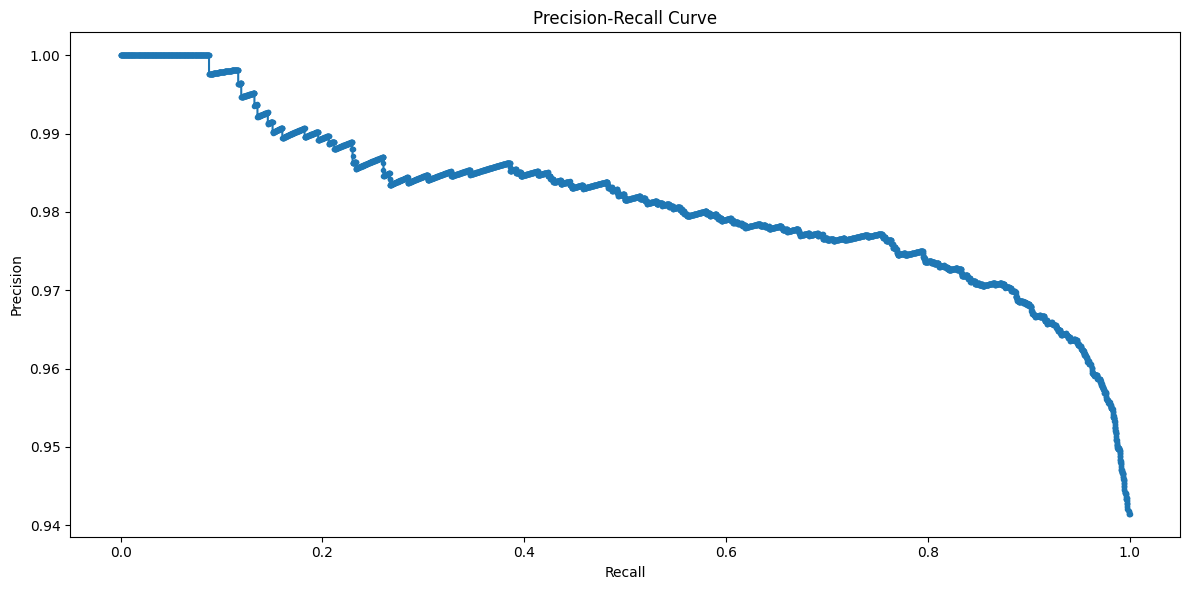

3. **Model Performance**

![Screenshot 2024-07-17 153857.png](<attachment:Screenshot 2024-07-17 153857.png>)

![Screenshot 2024-07-17 153850.png](<attachment:Screenshot 2024-07-17 153850.png>)
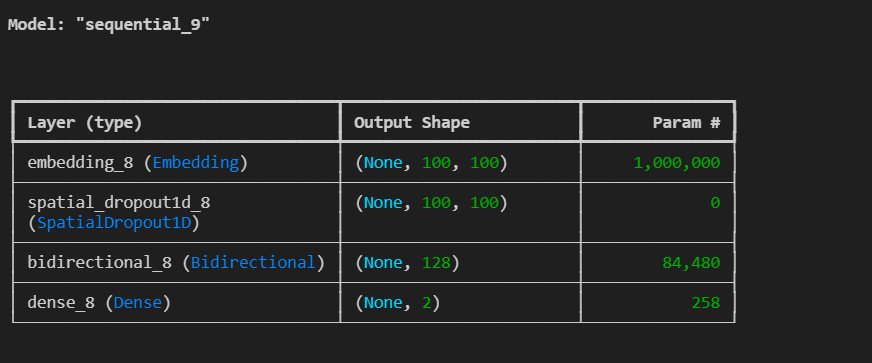
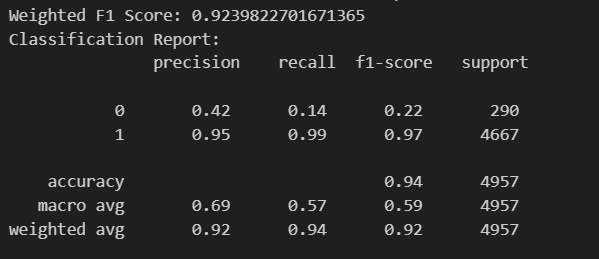

In [1]:
import re
import string
import joblib
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from bs4 import BeautifulSoup
import contractions
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
class ReduceMeanLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.reduce_mean(inputs, axis=1)

In [3]:
# Function to preprocess the input text
def preprocess_text(text, tokenizer, max_length=100):
    text = text.lower()
    # Clean the text
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)  # Remove mentions and hashtags
    text = re.sub(r'\b\d+\b', '', text)  # Remove numbers
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    text = ' '.join([contractions.fix(word) for word in text.split()])  # Expand contractions
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize words
    clean_text = ' '.join(tokens)
    
    # Tokenize and pad sequences
    sequence = tokenizer.texts_to_sequences([clean_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length)
    
    return padded_sequence

In [10]:
# Load tokenizer and model
tokenizer_save_path = 'tokenizer.joblib'
model_save_path = 'best_model.keras'

tokenizer = joblib.load(tokenizer_save_path)
model = load_model(model_save_path, custom_objects={'ReduceMeanLayer': ReduceMeanLayer})


In [12]:
# Function to make predictions
def predict_text(text):
    processed_text = preprocess_text(text, tokenizer)
    prediction = model.predict(processed_text)
    predicted_label = np.argmax(prediction, axis=1)[0]
    return 'Non Hate Speech' if predicted_label == 1 else 'Hate Speech' 

In [14]:
# Get input text from user
input_text = input("Enter the text to predict: ")


# Make prediction
prediction = predict_text(input_text)
print(input_text)
print(f"The input text is classified as: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
hi
The input text is classified as: Non Hate Speech
